### 1. Longitudinal Data

For linear longitudinal data models, we demonstrate the theory and computational aspectsusing a dataset of automobile bodily injury liability claims. The dataset contains claims of 6 years from 1993 to 1998 for a random sample of twenty-nine towns in the state of Massachusetts. All variables in monetary values are rescaled using the consumer price index to mitigate the eect of time trends. We are interested in the behavior of average claims per unit of exposure, that is, the pure premium, for each town and each year. Two explanatory variables are available for theregression analysis, the per-capita income (PCI) and the population per square mile (PPSM) of each town.

The variables and their descriptions are summarized in Table below:

    Variable     Description
    -----------------------------------
    TOWNCODE     The index of Massachusetts towns
    YEAR         The calendar year of the observation
    AC           Average claims per unit of exposure
    PCI          Per-capita income of the town
    PPSM         Population per square mile of the town

In [1]:
library(nlme)
library(CASdatasets)

Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Loading required package: sp


In [2]:
data(usmassBI2)
#Check longitudinal structure
AutoClaim <- usmassBI2
head(usmassBI2) 

TOWNCODE,YEAR,AC,PCI,PPSM
10,1993,160.8522,18134.04,1475.551
10,1994,158.3382,18495.88,1461.811
10,1995,156.8098,18778.29,1488.991
10,1996,168.9899,18740.46,1502.932
10,1997,171.8229,18809.62,1534.425
10,1998,153.7644,19034.59,1557.694


### 2. Linear Models for Longitudinal Data

We use the data in the first 5 years, namely 1993-1997, to develop the model and keep the observations in the final year for validation purposes. To explore relations among variables, the techniques used for usual regressions such as histogram and correlations statistics are ready to apply for longitudinal data. In addition, we introduce several more specialized techniques. The first is the multiple time series plot, where the average claims in multiple years for each town are joined using straight lines. The plot shows the development of claims over time and helps visualize town-specific effects.

In [3]:
# Use year 1993-1997 as trainning data and reserve year 1998 for validation
AutoClaimIn <- subset(AutoClaim, YEAR < 1998)

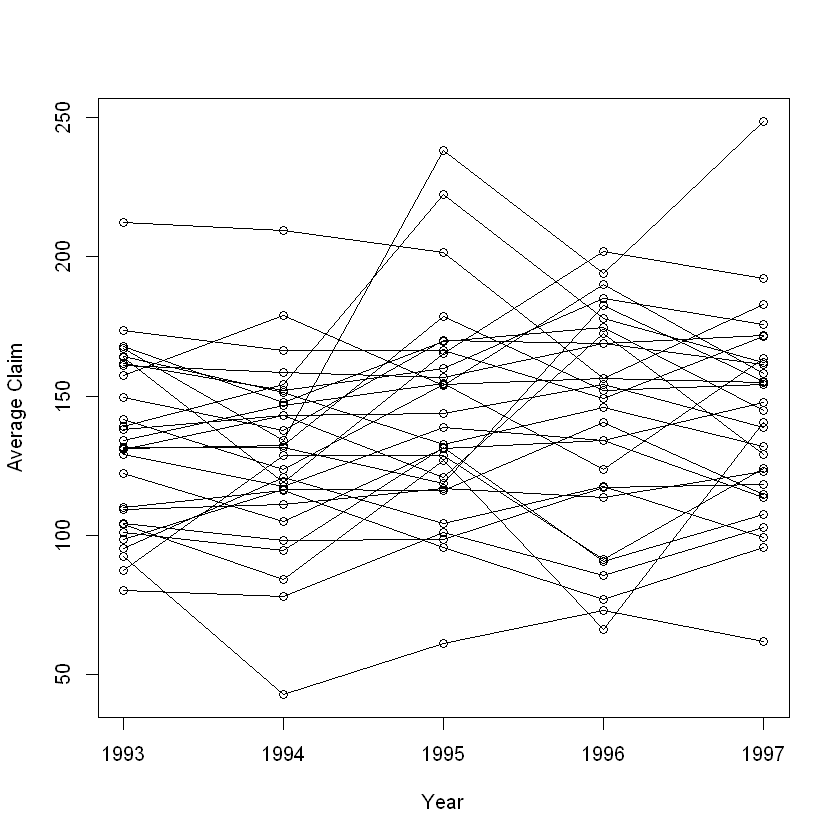

In [4]:
# Multiple time series plot
plot(AC ~ YEAR, data = AutoClaimIn, ylab="Average Claim", xlab="Year")
for (i in AutoClaimIn$TOWNCODE) {lines(AC ~ YEAR, data = subset(AutoClaimIn, TOWNCODE == i)) }

One can also use scatterplots to help detect the relation between the response and explanatory variables. Figure below displays the scatterplot for variables PCI and PPSM, suggesting the negative relation between AC and PCI and the positive relation between AC and PPSM. Note that we use both PCI and PPSM in log scale, and logarithmic values will be used in the following analysis. In addition, we also serially connect the observations to identify potential patterns in each covariate. In this case, we observe that PCI varies over time and PPSM is relatively statable.

In [5]:
# Scatter plot to explore relations
AutoClaimIn$lnPCI <- log(AutoClaimIn$PCI)
AutoClaimIn$lnPPSM <- log(AutoClaimIn$PPSM)

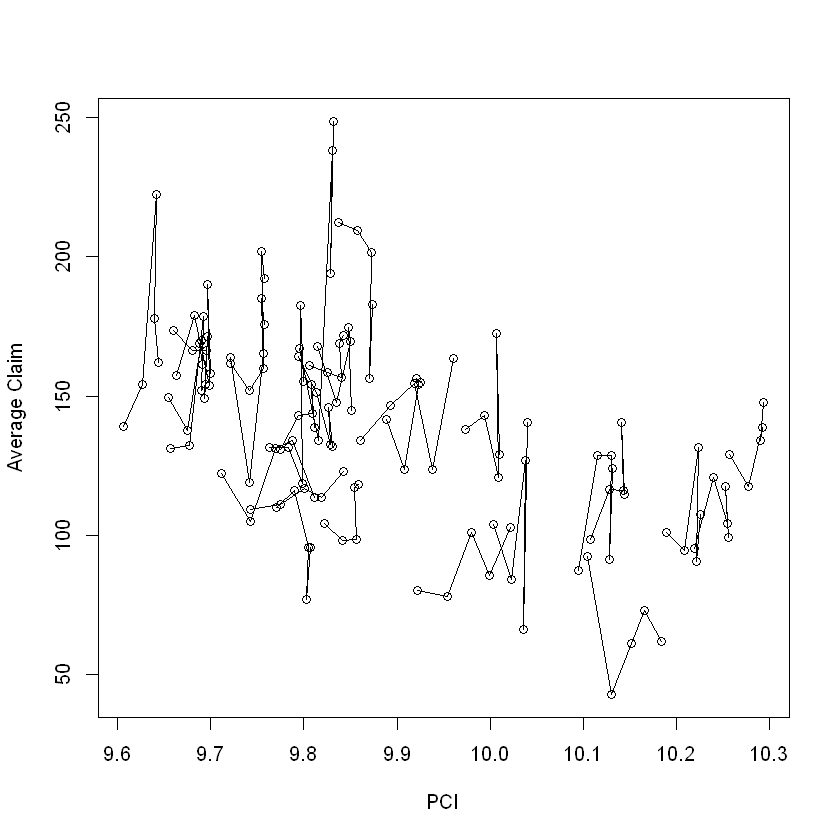

In [6]:
plot(AC ~ lnPCI, data = AutoClaimIn, ylab="Average Claim", xlab="PCI")
for (i in AutoClaimIn$TOWNCODE) {lines(AC ~ lnPCI, data = subset(AutoClaimIn, TOWNCODE == i)) }

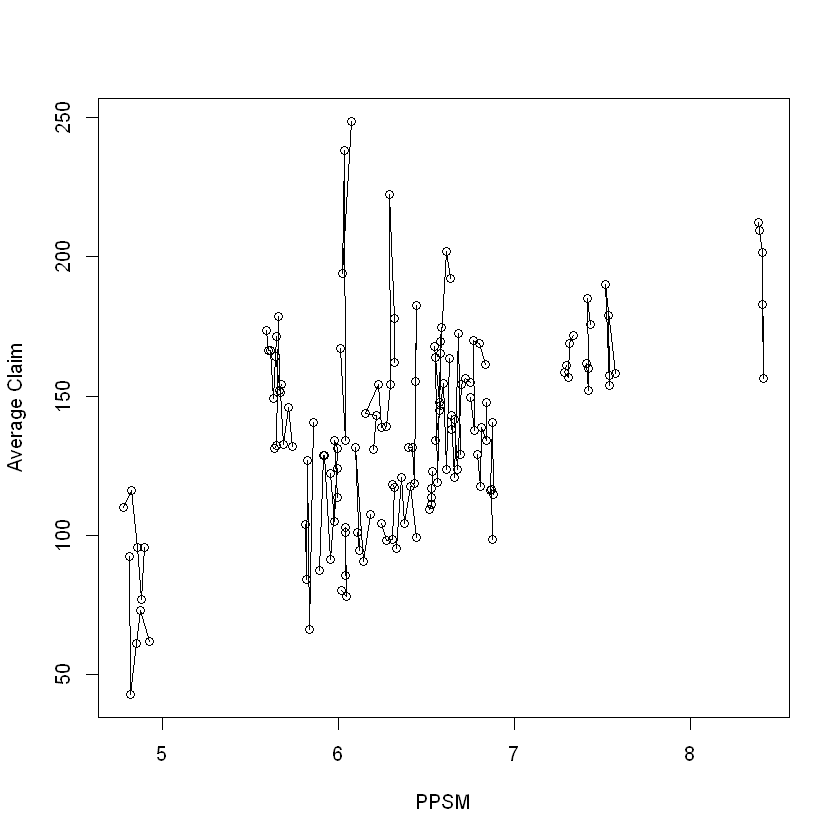

In [7]:
plot(AC ~ lnPPSM, data = AutoClaimIn, ylab="Average Claim", xlab="PPSM")
for (i in AutoClaimIn$TOWNCODE) {lines(AC ~ lnPPSM, data = subset(AutoClaimIn, TOWNCODE == i)) }

As expected, we observe a significant negative effect of PCI and a positive effect of PPSM. We also observe an increasing trend in claims after purging off the in ation. Functions such as lm and anova are used to fit and analyze the ordinary least squares regression:

In [8]:
AutoClaimIn$YEAR <- AutoClaimIn$YEAR-1992
Pool.fit <- lm(AC ~ lnPCI+lnPPSM+YEAR, data=AutoClaimIn)

In [9]:
summary(Pool.fit)


Call:
lm(formula = AC ~ lnPCI + lnPPSM + YEAR, data = AutoClaimIn)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.944 -16.154  -1.759  14.300 104.468 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  899.569    120.150   7.487 6.98e-12 ***
lnPCI        -92.604     11.855  -7.812 1.17e-12 ***
lnPPSM        22.305      2.933   7.606 3.64e-12 ***
YEAR           3.923      1.519   2.583   0.0108 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 25.75 on 141 degrees of freedom
Multiple R-squared:  0.4908,	Adjusted R-squared:   0.48 
F-statistic:  45.3 on 3 and 141 DF,  p-value: < 2.2e-16


In [10]:
anova(Pool.fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
lnPCI,1,46354.817,46354.8174,69.902772,5.402241e-14
lnPPSM,1,39343.808,39343.8085,59.330215,2.141284e-12
YEAR,1,4423.335,4423.3352,6.670362,1.082144e-02
Residuals,141,93501.718,663.1327,NA,NA


#### 2.1. Fixed Effects Models

Repeated observations allow one to study the heterogeneity, be it either of subject or of time. We begin with the basic fixed effects model by introducing subject-specific intercepts in the model.

We fit this basic fixed effects model FE.fit using lm by treating TOWNCODE as a categorical variable. The t- and F-statistics are constructed in the same way as in classical regression models. Note that the above model could be easily modified to account for time-specific heterogeneity . Similarly, using categorical variables for the time dimension, least squares estimation is readily applied.

In [11]:
# Basic fixed-effects model
FE.fit <- lm(AC ~ factor(TOWNCODE)+lnPCI+lnPPSM+YEAR-1, data=AutoClaimIn)

In [12]:
summary(FE.fit)


Call:
lm(formula = AC ~ factor(TOWNCODE) + lnPCI + lnPPSM + YEAR - 
    1, data = AutoClaimIn)

Residuals:
    Min      1Q  Median      3Q     Max 
-55.645  -8.900   0.177   8.995  50.141 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)  
factor(TOWNCODE)10 1660.321   1846.793   0.899    0.371  
factor(TOWNCODE)11 1558.851   1794.617   0.869    0.387  
factor(TOWNCODE)12 1554.375   1884.831   0.825    0.411  
factor(TOWNCODE)13 1360.128   1731.874   0.785    0.434  
factor(TOWNCODE)14 1443.895   1780.094   0.811    0.419  
factor(TOWNCODE)15 1681.983   1841.401   0.913    0.363  
factor(TOWNCODE)16 1485.543   1760.324   0.844    0.401  
factor(TOWNCODE)17 1702.778   1840.263   0.925    0.357  
factor(TOWNCODE)21 1517.470   1818.260   0.835    0.406  
factor(TOWNCODE)30 1351.724   1733.570   0.780    0.437  
factor(TOWNCODE)31 1450.416   1855.472   0.782    0.436  
factor(TOWNCODE)32 1536.844   1793.293   0.857    0.393  
factor(TOWNCODE)33 1537.729   1823.963   

In [13]:
anova(FE.fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
factor(TOWNCODE),29,2897068.6051,99898.9174,280.36771085,4.412832e-92
lnPCI,1,2231.2763,2231.2763,6.26210815,1.376556e-02
lnPPSM,1,34.4613,34.4613,0.09671613,7.563795e-01
YEAR,1,1680.6629,1680.6629,4.71680390,3.195918e-02
Residuals,113,40263.4727,356.3139,NA,NA


We further discuss three specific tests for model specification and diagnostics.   

The first is the pooling test, where one wishes to test whether the subject-specific effect is significant. This can be done using the partial F test by calculating $ F$-$ratio = \frac{\mbox{(ErrorSS)$_{Pooled}$ -  ErrorSS}}{\mbox{(n - 1)s$^2$}} $. Here, ErrorSS and $s^2$ are from the heterogeneous model (i.e., FE.fit) and (ErrorSS)Pooled are from the homogeneous model (i.e., pool.fit). It can be shown that F-ratio follows an F-distribution with degrees of freedom df$_1$ = n-1 and df$_2$ = N-(n+K). In this example, the F-statistic is equal to (93,502-40,263)=(29-1)=18.88$^2$ = 5.33, so we reject the null hypothesis.

In [14]:
anova(Pool.fit,FE.fit)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
141,93501.72,NA,NA,NA,NA
113,40263.47,28,53238.25,5.33621,7.214219e-11


#### 2..2. Models with Serial Correlation

An alternative approach to capture heterogeneity is to use serial correlation. The intuition is that if there are some unobserved time constant variables affecting the response, they will introduce correlation among repeated observations. To motivate this approach, we examine the serial correlation of residuals from Pool.fit. The results show strong temporal correlation among AC after removing the effects of explanatory variables. This suggests that the i.i.d. assumption used in the homogeneous model is not appropriate.

In [15]:
# Correlation among residuals
AutoClaimIn$rPool <- resid(Pool.fit)
rvec <- cbind(subset(AutoClaimIn,YEAR==1)$rPool,subset(AutoClaimIn,YEAR==2)$rPool,
              subset(AutoClaimIn,YEAR==3)$rPool,subset(AutoClaimIn,YEAR==4)$rPool,
              subset(AutoClaimIn,YEAR==5)$rPool)
cor(rvec)

1.0000000,0.5862895,0.5187797,0.4207831,0.5424555
0.5862895,1.0000000,0.3911814,0.2164202,0.2555096
0.5187797,0.3911814,1.0000000,0.3955654,0.7890728
0.4207831,0.2164202,0.3955654,1.0000000,0.4778912
0.5424555,0.2555096,0.7890728,0.4778912,1.0000000


In our application, we fit the linear model with three types of serial correlation: the compound symmetry, the AR(1), and the unstructured. We denote the resulting models by SCex.fit, SCar.fit, and SCun.fit, respectively. The models are fit using the function gls() in the nlme package. The argument correlation is used to specify matrix R($\tau$), and the argument method is used to specify the estimation method. The default estimation approach is the REML. The estimates of regression coeficients are similar and are consistent with the pooled cross-sectional regression model. The estimates of variance components suggest significant within-subject temporal correlation. Note that when unstructured covariance is specified, the model is not identiable in its most general form due to the nonuniqueness of R($\tau$).

In the package nlme, function intervals can be used to call for the 95% confidence interval of $$\tau, and function getVarCov can be used to call for the estimates of R($\hat{\tau}$).

In [16]:
# Compound symmetry
SCex.fit <- gls(AC ~ lnPCI+lnPPSM+YEAR, data=AutoClaimIn, correlation=corCompSymm(form=~1|TOWNCODE))
summary(SCex.fit)

Generalized least squares fit by REML
  Model: AC ~ lnPCI + lnPPSM + YEAR 
  Data: AutoClaimIn 
       AIC      BIC    logLik
  1303.913 1321.606 -645.9566

Correlation Structure: Compound symmetry
 Formula: ~1 | TOWNCODE 
 Parameter estimate(s):
     Rho 
0.473597 

Coefficients:
               Value Std.Error   t-value p-value
(Intercept) 887.8878 206.81071  4.293239   0e+00
lnPCI       -91.1979  20.41210 -4.467833   0e+00
lnPPSM       21.9614   5.07913  4.323844   0e+00
YEAR          3.9119   1.14457  3.417801   8e-04

 Correlation: 
       (Intr) lnPCI  lnPPSM
lnPCI  -0.988              
lnPPSM -0.249  0.096       
YEAR    0.197 -0.205 -0.082

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-1.91796179 -0.63109278 -0.05216166  0.54893924  3.98126312 

Residual standard error: 26.23929 
Degrees of freedom: 145 total; 141 residual

In [17]:
intervals(SCex.fit,which = "var-cov")

Approximate 95% confidence intervals

 Correlation structure:
        lower     est.     upper
Rho 0.2868884 0.473597 0.6438492
attr(,"label")
[1] "Correlation structure:"

 Residual standard error:
   lower     est.    upper 
22.21557 26.23929 30.99180 

In [18]:
getVarCov(SCex.fit)

Marginal variance covariance matrix
       [,1]   [,2]   [,3]   [,4]   [,5]
[1,] 688.50 326.07 326.07 326.07 326.07
[2,] 326.07 688.50 326.07 326.07 326.07
[3,] 326.07 326.07 688.50 326.07 326.07
[4,] 326.07 326.07 326.07 688.50 326.07
[5,] 326.07 326.07 326.07 326.07 688.50
  Standard Deviations: 26.239 26.239 26.239 26.239 26.239 

In [19]:
# AR(1)
SCar.fit <- gls(AC ~ lnPCI+lnPPSM+YEAR, data=AutoClaimIn,correlation=corAR1(form=~1|TOWNCODE))
summary(SCar.fit)

Generalized least squares fit by REML
  Model: AC ~ lnPCI + lnPPSM + YEAR 
  Data: AutoClaimIn 
       AIC    BIC    logLik
  1320.507 1338.2 -654.2537

Correlation Structure: AR(1)
 Formula: ~1 | TOWNCODE 
 Parameter estimate(s):
      Phi 
0.4342606 

Coefficients:
               Value Std.Error   t-value p-value
(Intercept) 891.4542 168.25109  5.298356  0.0000
lnPCI       -91.3279  16.60839 -5.498902  0.0000
lnPPSM       21.7551   4.11354  5.288646  0.0000
YEAR          3.5501   1.66449  2.132863  0.0347

 Correlation: 
       (Intr) lnPCI  lnPPSM
lnPCI  -0.987              
lnPPSM -0.248  0.095       
YEAR    0.092 -0.118 -0.046

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-1.92457756 -0.64607192 -0.05513952  0.54124387  4.05608520 

Residual standard error: 25.9463 
Degrees of freedom: 145 total; 141 residual

In [20]:
intervals(SCar.fit,which = "var-cov")

Approximate 95% confidence intervals

 Correlation structure:
        lower      est.     upper
Phi 0.2636709 0.4342606 0.5785109
attr(,"label")
[1] "Correlation structure:"

 Residual standard error:
   lower     est.    upper 
22.61972 25.94630 29.76210 

In [21]:
getVarCov(SCar.fit)

Marginal variance covariance matrix
        [,1]    [,2]   [,3]    [,4]    [,5]
[1,] 673.210 292.350 126.96  55.132  23.942
[2,] 292.350 673.210 292.35 126.960  55.132
[3,] 126.960 292.350 673.21 292.350 126.960
[4,]  55.132 126.960 292.35 673.210 292.350
[5,]  23.942  55.132 126.96 292.350 673.210
  Standard Deviations: 25.946 25.946 25.946 25.946 25.946 

In [22]:
# Unstructured
SCun.fit <- gls(AC ~ lnPCI+lnPPSM+YEAR, data=AutoClaimIn, correlation=corSymm(form=~1|TOWNCODE))
summary(SCun.fit)

Generalized least squares fit by REML
  Model: AC ~ lnPCI + lnPPSM + YEAR 
  Data: AutoClaimIn 
       AIC      BIC    logLik
  1301.852 1346.084 -635.9261

Correlation Structure: General
 Formula: ~1 | TOWNCODE 
 Parameter estimate(s):
 Correlation: 
  1     2     3     4    
2 0.697                  
3 0.467 0.327            
4 0.453 0.258 0.408      
5 0.537 0.273 0.751 0.506

Coefficients:
               Value Std.Error   t-value p-value
(Intercept) 878.6830 200.85210  4.374776  0.0000
lnPCI       -90.8071  19.80727 -4.584536  0.0000
lnPPSM       23.6983   4.95450  4.783180  0.0000
YEAR          1.8150   1.02842  1.764837  0.0798

 Correlation: 
       (Intr) lnPCI  lnPPSM
lnPCI  -0.988              
lnPPSM -0.251  0.097       
YEAR    0.204 -0.211 -0.094

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-1.77364675 -0.61800847 -0.00792551  0.55186491  4.15982448 

Residual standard error: 26.38472 
Degrees of freedom: 145 total; 141 residual

In [23]:
intervals(SCun.fit,which = "var-cov")

Approximate 95% confidence intervals

 Correlation structure:
                lower      est.     upper
cor(1,2)  0.459318778 0.6974028 0.8419996
cor(1,3)  0.155927953 0.4665445 0.6931939
cor(1,4)  0.069292248 0.4525656 0.7194194
cor(1,5)  0.196532307 0.5374620 0.7624481
cor(2,3)  0.002810911 0.3268129 0.5887174
cor(2,4) -0.155337258 0.2583914 0.5950013
cor(2,5) -0.123064323 0.2730901 0.5941727
cor(3,4)  0.114267295 0.4081348 0.6363251
cor(3,5)  0.572861308 0.7508048 0.8611617
cor(4,5)  0.201334678 0.5055812 0.7208576
attr(,"label")
[1] "Correlation structure:"

 Residual standard error:
   lower     est.    upper 
22.30449 26.38472 31.21137 

In [24]:
getVarCov(SCun.fit)

Marginal variance covariance matrix
       [,1]   [,2]   [,3]   [,4]   [,5]
[1,] 696.15 485.50 324.79 315.06 374.16
[2,] 485.50 696.15 227.51 179.88 190.11
[3,] 324.79 227.51 696.15 284.12 522.68
[4,] 315.06 179.88 284.12 696.15 351.96
[5,] 374.16 190.11 522.68 351.96 696.15
  Standard Deviations: 26.385 26.385 26.385 26.385 26.385 

The usual t- or F-test statistics follow as for the i.i.d. case. Caution is needed for the tests based on the likelihood function. For example, the likelihood ratio test relies on the value of log-likelihood function rather than the restricted likelihood. One can use method="ML" in the gls() function to implement maximum likelihood estimation. We perform the test using anova for the models with serial correlation and the pooled cross{sectional regression. The results support the evidence of positive serial correlation.

In [25]:
# Likelihood ratio test
SCex.fit.ml <- gls(AC ~ lnPCI+lnPPSM+YEAR, data=AutoClaimIn, 
                   correlation=corCompSymm(form=~1|TOWNCODE), method="ML")
SCar.fit.ml <- gls(AC ~ lnPCI+lnPPSM+YEAR, data=AutoClaimIn,
                   correlation=corAR1(form=~1|TOWNCODE), method="ML")
SCun.fit.ml <- gls(AC ~ lnPCI+lnPPSM+YEAR, data=AutoClaimIn,
                   correlation=corSymm(form=~1|TOWNCODE), method="ML")

In [26]:
anova(SCex.fit.ml, Pool.fit)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
SCex.fit.ml,"gls(model = AC ~ lnPCI + lnPPSM + YEAR, data = AutoClaimIn, correlation = corCompSymm(form = ~1 | TOWNCODE), method = ""ML"")",1,6,1323.212,1341.073,-655.6062,,NA,NA
Pool.fit,"lm(formula = AC ~ lnPCI + lnPPSM + YEAR, data = AutoClaimIn)",2,5,1359.497,1374.381,-674.7487,1 vs 2,38.28505,6.112933e-10


In [27]:
anova(SCar.fit.ml, Pool.fit)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
SCar.fit.ml,"gls(model = AC ~ lnPCI + lnPPSM + YEAR, data = AutoClaimIn, correlation = corAR1(form = ~1 | TOWNCODE), method = ""ML"")",1,6,1339.344,1357.205,-663.6721,,NA,NA
Pool.fit,"lm(formula = AC ~ lnPCI + lnPPSM + YEAR, data = AutoClaimIn)",2,5,1359.497,1374.381,-674.7487,1 vs 2,22.15326,2.517277e-06


In [28]:
anova(SCun.fit.ml, Pool.fit)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
SCun.fit.ml,"gls(model = AC ~ lnPCI + lnPPSM + YEAR, data = AutoClaimIn, correlation = corSymm(form = ~1 | TOWNCODE), method = ""ML"")",1,15,1320.753,1365.404,-645.3763,,NA,NA
Pool.fit,"lm(formula = AC ~ lnPCI + lnPPSM + YEAR, data = AutoClaimIn)",2,5,1359.497,1374.381,-674.7487,1 vs 2,58.74476,6.257276e-09


#### 2.3. Models with Random Eects

We implement the error components model EC.fit using function lme() in the nlme package. The argument random is used to specify the random effects in the mixed-effects model. The default uses the REML to estimate model parameters. The confidence intervals of variance components are calculated in a similar way as for models with serial correlation and can be called by function intervals().

In [29]:
# Error-components model
EC.fit <- lme(AC ~ lnPCI+lnPPSM+YEAR, data=AutoClaimIn, random=~1|TOWNCODE)
summary(EC.fit)

Linear mixed-effects model fit by REML
 Data: AutoClaimIn 
       AIC      BIC    logLik
  1303.913 1321.606 -645.9566

Random effects:
 Formula: ~1 | TOWNCODE
        (Intercept) Residual
StdDev:    18.05746 19.03756

Fixed effects: AC ~ lnPCI + lnPPSM + YEAR 
               Value Std.Error  DF   t-value p-value
(Intercept) 887.8878 206.81071 113  4.293239   0e+00
lnPCI       -91.1979  20.41210 113 -4.467833   0e+00
lnPPSM       21.9614   5.07913 113  4.323844   0e+00
YEAR          3.9119   1.14457 113  3.417801   9e-04
 Correlation: 
       (Intr) lnPCI  lnPPSM
lnPCI  -0.988              
lnPPSM -0.249  0.096       
YEAR    0.197 -0.205 -0.082

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-2.53017784 -0.61089180  0.01099886  0.50082006  2.91907172 

Number of Observations: 145
Number of Groups: 29 

In [30]:
intervals(EC.fit, which="var-cov")

Approximate 95% confidence intervals

 Random Effects:
  Level: TOWNCODE 
                   lower     est.    upper
sd((Intercept)) 12.93755 18.05746 25.20352

 Within-group standard error:
   lower     est.    upper 
16.72928 19.03756 21.66434 

A relevant question to ask is whether the subject-specific effects are significant or the intercepts take a common value. In our example, the test statistic is equal to 56.82 and thus we reject the null hypothesis of constant intercept.

In [31]:
# Pooling test
tcode = unique(AutoClaimIn$TOWNCODE)
n = length(tcode)
N = nrow(AutoClaimIn)
T <- rep(NA,n)
s <- rep(NA,n)
for (i in 1:n){T[i] <- nrow(subset(AutoClaimIn,TOWNCODE==tcode[i]))
               s[i] <- (sum(subset(AutoClaimIn,TOWNCODE==tcode[i])$rPool)^2
             - sum(subset(AutoClaimIn,TOWNCODE==tcode[i])$rPool^2))/T[i]/(T[i]-1)}
TS <- (sum(s*sqrt(T*(T-1)))*N/sum(AutoClaimIn$rPool^2))^2/2/n
TS

[1] 56.85278

To implement the mixed-efiects model, one could use correlation in the lme() function to specify serial correlation. For example, in the model RE.fit, we use update() to include AR(1) temporal correlation in the error components model. Here we see that with subject-specific intercept, the serial correlation (-0.014) is not significant. The function getVarCov() can be used to output the variance-covariance matrix. The argument type="conditional" provides the estimate of $R_i$ and the argument type="marginal" provides the estimate of $V_i$. We further perform a likelihood ratio test to test for the serial correlation using anova. Consistently, the large p-value does not show support for serial correlation in the error components model. Note: we use method="ML" to get the true log-likelihood value for this test.

In [32]:
# Error component with AR1
RE.fit <- update(EC.fit, correlation=corAR1(form=~1|TOWNCODE))
summary(RE.fit)

Linear mixed-effects model fit by REML
 Data: AutoClaimIn 
       AIC      BIC    logLik
  1305.897 1326.538 -645.9484

Random effects:
 Formula: ~1 | TOWNCODE
        (Intercept) Residual
StdDev:    18.10974  18.9826

Correlation Structure: AR(1)
 Formula: ~1 | TOWNCODE 
 Parameter estimate(s):
        Phi 
-0.01444735 
Fixed effects: AC ~ lnPCI + lnPPSM + YEAR 
               Value Std.Error  DF   t-value p-value
(Intercept) 887.8789 206.74423 113  4.294577   0e+00
lnPCI       -91.2038  20.40536 113 -4.469601   0e+00
lnPPSM       21.9669   5.07795 113  4.325938   0e+00
YEAR          3.9237   1.13499 113  3.457055   8e-04
 Correlation: 
       (Intr) lnPCI  lnPPSM
lnPCI  -0.988              
lnPPSM -0.249  0.096       
YEAR    0.198 -0.207 -0.082

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-2.55033919 -0.60887177  0.02008323  0.49759528  2.91281638 

Number of Observations: 145
Number of Groups: 29 

In [33]:
intervals(RE.fit, which="var-cov")

Approximate 95% confidence intervals

 Random Effects:
  Level: TOWNCODE 
                   lower     est.    upper
sd((Intercept)) 12.97163 18.10974 25.28307

 Correlation structure:
         lower        est.     upper
Phi -0.2172584 -0.01444735 0.1895595
attr(,"label")
[1] "Correlation structure:"

 Within-group standard error:
   lower     est.    upper 
16.58597 18.98260 21.72554 

In [34]:
# Get variance components
getVarCov(RE.fit)

Random effects variance covariance matrix
            (Intercept)
(Intercept)      327.96
  Standard Deviations: 18.11 

In [35]:
getVarCov(RE.fit, type="conditional")

TOWNCODE 10 
Conditional variance covariance matrix
            1           2          3           4           5
1  3.6034e+02  -5.2059000   0.075212  -0.0010866  1.5699e-05
2 -5.2059e+00 360.3400000  -5.205900   0.0752120 -1.0866e-03
3  7.5212e-02  -5.2059000 360.340000  -5.2059000  7.5212e-02
4 -1.0866e-03   0.0752120  -5.205900 360.3400000 -5.2059e+00
5  1.5699e-05  -0.0010866   0.075212  -5.2059000  3.6034e+02
  Standard Deviations: 18.983 18.983 18.983 18.983 18.983 

In [36]:
getVarCov(RE.fit, type="marginal")

TOWNCODE 10 
Marginal variance covariance matrix
       1      2      3      4      5
1 688.30 322.76 328.04 327.96 327.96
2 322.76 688.30 322.76 328.04 327.96
3 328.04 322.76 688.30 322.76 328.04
4 327.96 328.04 322.76 688.30 322.76
5 327.96 327.96 328.04 322.76 688.30
  Standard Deviations: 26.236 26.236 26.236 26.236 26.236 

In [37]:
# Likelihood ratio test
EC.fit.ml <- lme(AC ~ lnPCI+lnPPSM+YEAR, data=AutoClaimIn, random=~1|TOWNCODE, method="ML")
RE.fit.ml <- update(EC.fit, correlation=corAR1(form=~1|TOWNCODE), method="ML")
anova(EC.fit.ml, RE.fit.ml)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
EC.fit.ml,"lme.formula(fixed = AC ~ lnPCI + lnPPSM + YEAR, data = AutoClaimIn, random = ~1 | TOWNCODE, method = ""ML"")",1,6,1323.212,1341.073,-655.6062,,NA,NA
RE.fit.ml,"lme.formula(fixed = AC ~ lnPCI + lnPPSM + YEAR, data = AutoClaimIn, random = ~1 | TOWNCODE, correlation = corAR1(form = ~1 | TOWNCODE), method = ""ML"")",2,7,1325.171,1346.009,-655.5857,1 vs 2,0.04087198,0.8397852


We conclude this section with the Hausman test. As an example, we compare the basic fixed-effects model with the error components model. The test statistic's observed value is 3.97, supporting the error components formulation.

In [38]:
# Hausman test
Var.FE <- vcov(FE.fit)[-(1:n),-(1:n)]
Var.EC <- vcov(EC.fit)[-1,-1]
beta.FE <- coef(FE.fit)[-(1:n)]
beta.EC <- fixef(EC.fit)[-1]
ChiSq <- t(beta.FE-beta.EC)%*%solve(Var.FE-Var.EC)%*%(beta.FE-beta.EC)
ChiSq

3.970489


#### 2..4. Prediction

Here we reviews prediction for longitudinal data mixed-effects models. In previous, we discussed the estimation and inference of fixed parameters in the model. It is also of interest to summarize the subject-specific effects described by random variable. For example, in credibility theory, one is interested in the prediction of expected claims for a policyholder given his risk class. In doing so, we develop the best linear unbiased predictor (BLUP) of a random variable. Predictors are said to be linear if they are formed from a linear combination of the response and the BLUPs are constructed by minimizing the mean square error.

In [39]:
# BLUP
alpha.BLUP <- ranef(EC.fit)
beta.GLS <- fixef(EC.fit)
resid.BLUP <- residuals(EC.fit, type="response")
rstandard.BLUP <- residuals(EC.fit, type="normalized")
head(alpha.BLUP)

,(Intercept)
10,-0.2049993
11,-6.9197373
12,17.7349235
13,20.9538588
14,-0.1942180
15,-5.6464625


To conclude this section, we compare the performance of alternative models using the data of automobile insurance. For in-sample data, we report the informationbased model selection criteria AIC and BIC. For out-of-sample, we report the sum of squared prediction error (SSPE) and the sum of absolute prediction error (SAPE). The results show that models that account for subject-specific effects perform better, regardless of the way that heterogeneity is accommodated.

In [40]:
# Use data of year 1998 for validation
AutoClaimOut <- subset(AutoClaim, YEAR == 1998)

In [41]:
# Define new variables
AutoClaimOut$lnPCI <- log(AutoClaimOut$PCI)
AutoClaimOut$lnPPSM <- log(AutoClaimOut$PPSM)
AutoClaimOut$YEAR <- AutoClaimOut$YEAR-1992

In [42]:
# Compare models Pool.fit, SCar.fit, FE.fit, EC.fit, RE.fit and FEar.fit
# Fixed-effects model with AR(1)
FEar.fit <- gls(AC ~ factor(TOWNCODE)+lnPCI+lnPPSM+YEAR-1,
                data=AutoClaimIn, correlation=corAR1(form=~1|TOWNCODE))
FEar.fit.ml <- gls(AC ~ factor(TOWNCODE)+lnPCI+lnPPSM+YEAR-1,
                data=AutoClaimIn, correlation=corAR1(form=~1|TOWNCODE), method="ML")

In [43]:
# Prediction
Xmat <- cbind(rep(1,nrow(AutoClaimOut)), AutoClaimOut$lnPCI, AutoClaimOut$lnPPSM,AutoClaimOut$YEAR)

In [44]:
beta.Pool <- coef(Pool.fit)
pred.Pool <- Xmat%*%beta.Pool

MSPE.Pool <- sum((pred.Pool - AutoClaimOut$AC)^2)
MSPE.Pool
MAPE.Pool <- sum(abs(pred.Pool - AutoClaimOut$AC))
MAPE.Pool

[1] 22201.78

[1] 681.2473

In [45]:
beta.SCar <- coef(SCar.fit)
pred.SCar <- Xmat%*%beta.SCar

MSPE.SCar <- sum((pred.SCar - AutoClaimOut$AC)^2)
MSPE.SCar
MAPE.SCar <- sum(abs(pred.SCar - AutoClaimOut$AC))
MAPE.SCar

[1] 21242.64

[1] 658.9786

In [46]:
beta.FE <- coef(FE.fit)[-(1:29)]
pred.FE <- coef(FE.fit)[1:29] + Xmat[,-1]%*%beta.FE

MSPE.FE <- sum((pred.FE - AutoClaimOut$AC)^2)
MSPE.FE
MAPE.FE <- sum(abs(pred.FE - AutoClaimOut$AC)) 
MAPE.FE

[1] 21506.07

[1] 660.5894

In [47]:
beta.FEar <- coef(FEar.fit)[-(1:29)]
pred.FEar <- coef(FEar.fit)[1:29] + Xmat[,-1]%*%beta.FEar

MSPE.FEar <- sum((pred.FEar - AutoClaimOut$AC)^2)
MSPE.FEar
MAPE.FEar <- sum(abs(pred.FEar - AutoClaimOut$AC))
MAPE.FEar

[1] 21573.79

[1] 662.0422

In [48]:
alpha.EC <- ranef(EC.fit)
beta.EC <- fixef(EC.fit)
pred.EC <- alpha.EC+Xmat%*%beta.EC

MSPE.EC <- sum((pred.EC - AutoClaimOut$AC)^2)
MSPE.EC
MAPE.EC <- sum(abs(pred.EC - AutoClaimOut$AC))
MAPE.EC

[1] 19515.86

[1] 619.4411

In [49]:
alpha.RE <- ranef(RE.fit)
beta.RE <- fixef(RE.fit)
pred.RE <- alpha.RE+Xmat%*%beta.RE

MSPE.RE <- sum((pred.RE - AutoClaimOut$AC)^2)
MSPE.RE
MAPE.RE <- sum(abs(pred.RE - AutoClaimOut$AC))
MAPE.RE

[1] 19572.94

[1] 620.6382

TABLE: Comparison of alternative models

                                           In-Sample        Out-of-Sample
                                         AIC      BIC       SSPE     SAPE
    -----------------------------------------------------------------------
    Pooled cross-sectional model         1359.50 1374.38    22201.78 681.25
    Pooled cross-sectional with AR(1)    1339.34 1357.21    21242.64 658.98
    Fixed-effects model                  1293.33 1391.56    21506.07 660.59
    Fixed-effects with AR(1)             1286.03 1387.24    21573.79 662.04
    Error-components model               1323.21 1341.07    19515.86 619.44
    Error-components with AR(1)          1325.17 1346.01    19572.94 620.64

### 3. Generalized Linear Models for Longitudinal Data

#### 3.1. Transition Rules, Transition Probabilities and Stationary Distribution

In R, we specify this one-step transition matrix P as follows:

In [50]:
Pmatrix =
function(th) {
    P = matrix(nrow=6,ncol=6,data=0)
    P[1,1]=P[2,1]=P[3,2]=P[4,3]=P[5,4]=P[6,5]= exp(-th)
    P[,6] = 1-exp(-th)
    return(P)}

We specify the stationary distribution of the (-1/Top Scale) in R:

In [51]:
lim.distr = function(matrix) {
    et = matrix(nrow=1, ncol=dim(matrix)[2], data=1)
    E = matrix(nrow=dim(matrix)[1], ncol=dim(matrix)[2], data=1)
    mat = diag(dim(matrix)[1]) - matrix + E
    inverse.mat = solve(mat)
    p = et %*% inverse.mat
    return(p)}

In [52]:
P = Pmatrix(0.1)
P

0.9048374,0.0000000,0.0000000,0.0000000,0.0000000,0.09516258
0.9048374,0.0000000,0.0000000,0.0000000,0.0000000,0.09516258
0.0000000,0.9048374,0.0000000,0.0000000,0.0000000,0.09516258
0.0000000,0.0000000,0.9048374,0.0000000,0.0000000,0.09516258
0.0000000,0.0000000,0.0000000,0.9048374,0.0000000,0.09516258
0.0000000,0.0000000,0.0000000,0.0000000,0.9048374,0.09516258


In [53]:
pi = lim.distr(P)
pi

0.6065307,0.06378939,0.07049817,0.07791253,0.08610666,0.09516258


#### 3.2 Relativities

The calculation of the relativities in a BM scale reveals some similarities with explicit credibility-type calculations.

In [54]:
#Without a priori ratemaking
a.hat = 0.8888
lambda.hat = 0.1474

In [55]:
int1 = function(theta, s, a, lambda) {
        a = a.hat
        lambda = lambda.hat
        f.dist = gamma(a)^(-1) * a^a * theta^(a-1) * exp(-a*theta)
        p = lim.distr(Pmatrix((lambda*theta)))
        return(theta*p[1,s+1]*f.dist)}
P1 = matrix(nrow=1, ncol=6, data=0)
for (i in 0:5) P1[1,i+1] = integrate(Vectorize(int1),lower=0,upper=Inf,s=i)$value

In [56]:
int2 = function(theta, s, a, lambda) {
    a = a.hat
    lambda = lambda.hat
    f.dist = gamma(a)^(-1) * a^a * theta^(a-1) * exp(-a*theta)
    p = lim.distr(Pmatrix((lambda*theta)))
    return(p[1,s+1]*f.dist)}
P2 = matrix(nrow=1, ncol=6, data=0)
for (i in 0:5) P2[1,i+1] = integrate(Vectorize(int2),lower=0,upper=Inf,s=i)$value

In [57]:
R = P1 / P2
R

0.5466848,1.21958,1.348203,1.507254,1.709032,1.973534


To demonstrate the calculation of relativities when accounting for a priori rating, we use the Portfolio A data from Denuit.

In [58]:
lambda = c(0.1176,0.1408,0.1897,0.2272,0.1457,0.1746,0.2351,0.2816,0.1761,0.2109,0.2840,0.3402,0.2182,
           0.2614,0.3520,0.0928,0.1112,0.1498,0.1794,0.1151,0.1378,0.1856,0.2223)
weights = c(0.1049,0.1396,0.0398,0.0705,0.0076,0.0122,0.0013,0.0014,0.0293,0.0299,0.0152,0.0242,0.0007,
            0.0009,0.0002,0.1338,0.1973,0.0294,0.0661,0.0372,0.0517,0.0025,0.0044)
a = 1.065
n=length(weights)

In [59]:
int3 = function(theta, lambda, a, l) {
        p = lim.distr(Pmatrix(lambda*theta))
        f.dist = gamma(a)^(-1) * a^a * theta^(a-1) * exp(-a*theta)
        return(theta*p[1,l+1]*f.dist)}

In [60]:
int4 = function(theta, lambda, a, l) {
        p = lim.distr(Pmatrix(lambda*theta))
        f.dist = gamma(a)^(-1) * a^a * theta^(a-1) * exp(-a*theta)
        return(p[1,l+1]*f.dist)}

In [61]:
teller1 = teller2 = noemer = array(dim=6, data=0)
result1 = result2 = array(dim=6, data=0)

In [62]:
for (i in 0:5) {
    b = c = array(dim=n,data=0)
    for (j in 1:n) {
        b[j] = integrate(Vectorize(int3),lower=0, upper=Inf,lambda=lambda[j],a=a,l=i)$value
        c[j] = integrate(Vectorize(int4),lower=0, upper=Inf,lambda=lambda[j],a=a,l=i)$value}
    teller1[i+1] = b %*% weights
    noemer[i+1] = c %*% weights
    R = teller1/noemer
    }

R # relativities with a priori rating

[1] 0.6118907 1.2088841 1.3124752 1.4388207 1.5985014 1.8123074

Summarizing, we obtain the relativities displayed in Table 15.5 (with and without a priori rating) for the (-/Top Scale) and the Portfolio A data from Denuit et al. (2007). The a posteriori corrections are less severe when a priori rating is taken into account.